# ✅ **Task 3: Decision Tree Classifier on Bank Marketing Dataset**


#### 🔹 Task Objective:

> Build a **Decision Tree Classifier** to predict customer subscription status (`y`) using the **Bank Marketing dataset**.
> Preprocess the data, train the model, and visualize the decision-making process.

---

### 🗂️ We'll use the **Bank Marketing dataset** because:

* It contains a **mix of categorical and numerical variables**
* Suitable for demonstrating **Label Encoding**, train-test split, and model training
* It’s widely used for classification tasks in data science interviews and competitions

---

### 📌 What We'll Do in Task 3:

1. **Load and explore** the dataset
2. **Encode** categorical variables with `LabelEncoder`
3. **Split** the dataset into training and testing sets
4. **Train** a Decision Tree Classifier (`criterion="entropy"`)
5. **Evaluate** the model using accuracy, confusion matrix, and classification report
6. **Visualize** the Decision Tree and save it as an image



In [4]:
# Task-03: Decision Tree Classifier on Bank Marketing Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

In [16]:

# 1. Load the dataset

df = pd.read_csv(r"C:\Users\Chethan Vakiti\Downloads\bank (1).csv", sep=';')  

In [18]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [14]:
print("Dataset Shape:", df.shape)

Dataset Shape: (4521, 1)


In [20]:
# 2. Encode categorical variables

In [39]:
cols = df.select_dtypes(include=['object']).columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [41]:
label_encoders = {}

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [43]:
# Save encoded dataset
os.makedirs("bank_dt_outputs", exist_ok=True)
df.to_csv("bank_dt_outputs/bank_encoded.csv", index=False)

In [ ]:
# 3. Split data into train & test sets

In [45]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# 4. Train Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=42)

clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [53]:
# 5. Predictions & Evaluation

y_pred = clf.predict(X_test)

Accuracy = accuracy_score(y_test,y_pred)

print("\nAccuracy:", Accuracy)


Accuracy: 0.901657458563536


In [55]:

Classification_report = classification_report(y_test,y_pred)

print("\nClassification Report:\n", Classification_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905



In [57]:
Confusion_matrix = confusion_matrix(y_test,y_pred)

print("\nConfusion Matrix:\n", Confusion_matrix)


Confusion Matrix:
 [[779  28]
 [ 61  37]]


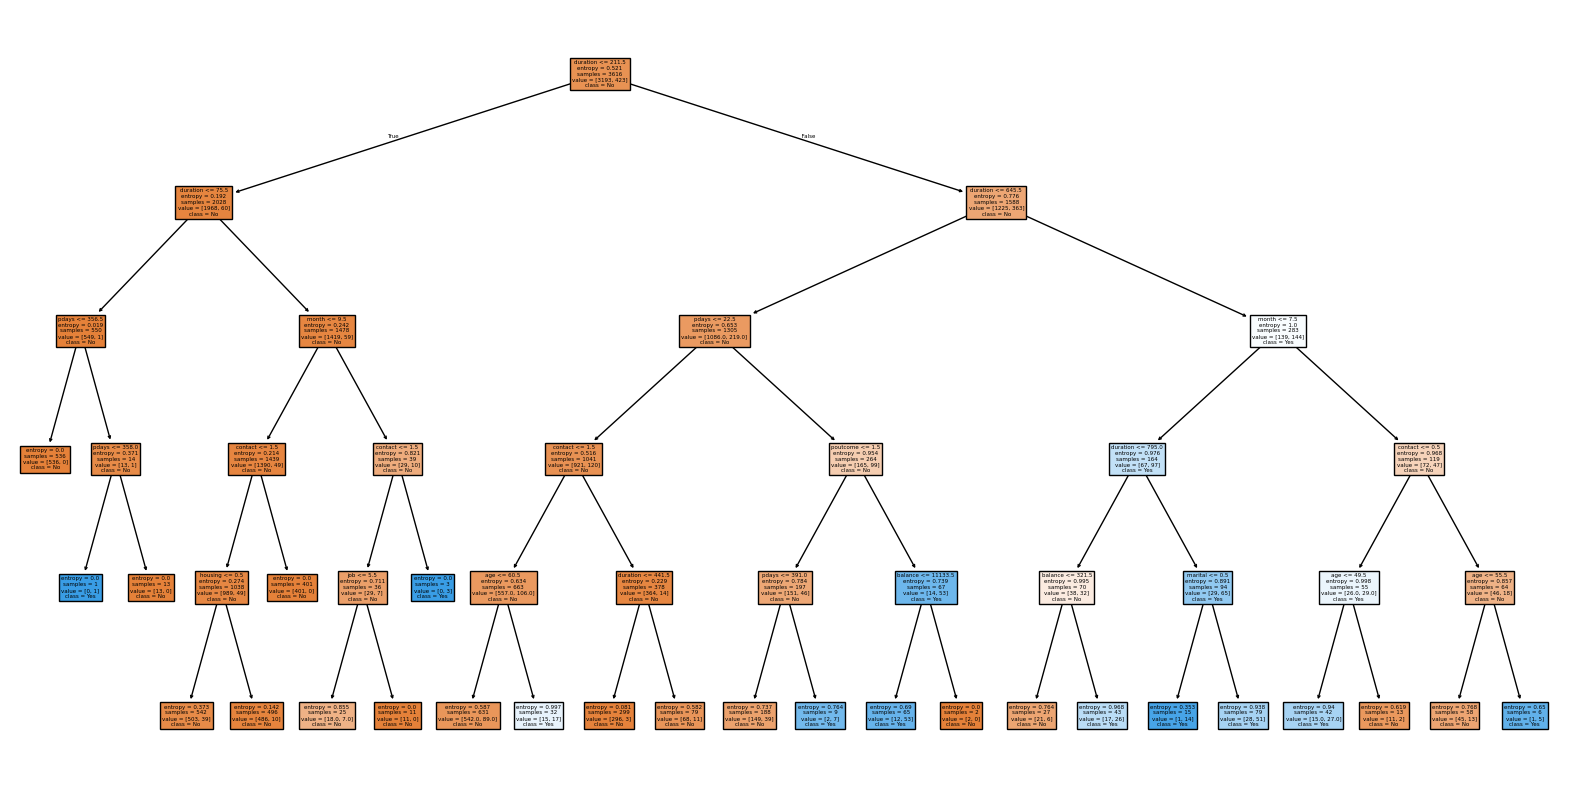

In [59]:
# 6. Visualize the Decision Tree

plt.figure(figsize=(20,10))

plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.savefig("bank_dt_outputs/decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()
